# Data preprocessing and visualisation
**Adapted from UoL DS MSc module DSM030 April 2021 session, Lecture 6**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# Load diabetes data
data = pd.read_csv("Diabetes1.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# If data uses "?" or similar for missing values, replace with NaN
non_numeric = re.compile('[^$0-9.]')
data.replace(non_numeric, np.NaN, inplace=True)

# Use isnull() to view missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Some columns (e.g. 'Insulin') seem to have no missing values but, in fact, some of their observations are zero which is not a plausible value for these metrics. I will convert the zeroes in these columns to NaNs and remove them.

In [4]:
# Change zeroes to NaNs in the relevant columns with NaNs
cols = [x for x in data.columns if x not in['Outcome', 'Pregnancies']]
data[cols] = data[cols].replace(['0',0], np.nan)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
# Insulin and SkinThickness have many missing values – approx. half and a third – so I will drop them
data = data.drop(['Insulin', 'SkinThickness'], axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [6]:
print(data.isnull().sum())

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [7]:
# Another option is interpolation: replacing NaN values with something, e.g. column mean or median.
# This is a valid approach when missing data is below a certain level, e.g. less than 10%.
# I will do interpolate missing values for the remaining columns.
# Since the columns with missing values are contiuous numeric data, I will use the mean.
data.fillna(data.mean(), inplace=True)

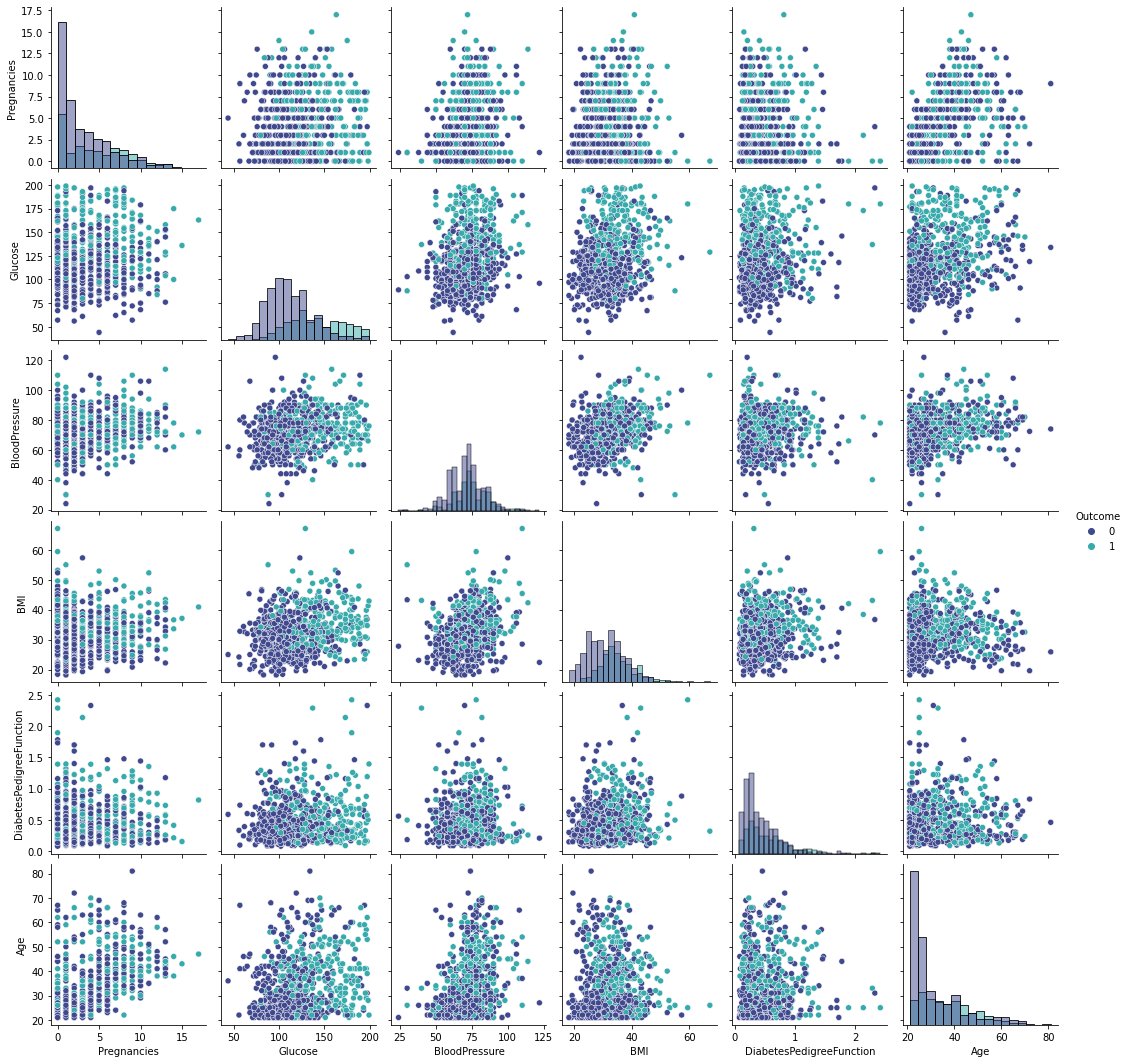

In [8]:
# Use pairplot to create scatter matrix
sns.pairplot(data, palette='mako', hue='Outcome', diag_kind='hist')

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.281268,-0.002763,0.324595,0.166074
BMI,0.021565,0.230941,0.281268,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

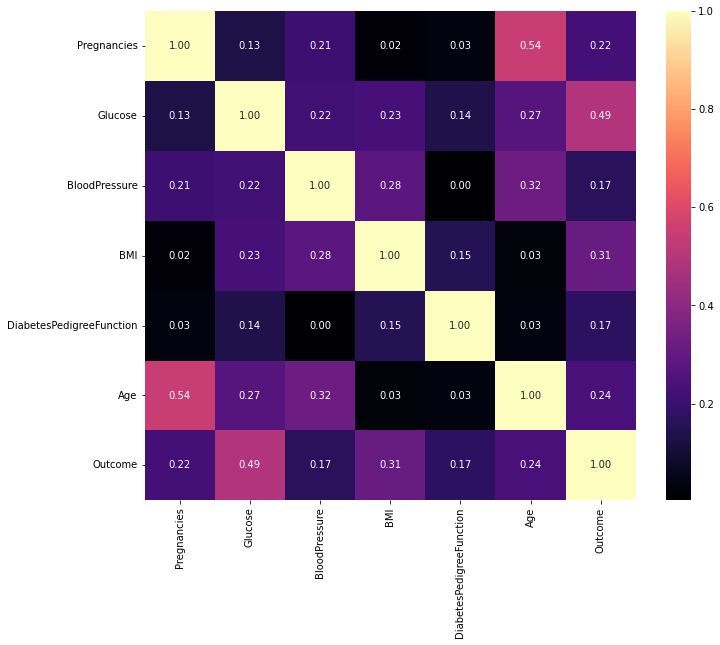

In [10]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(11,9))

# Use np.abs so that negative correlations are still visulaised as useful correlations
sns.heatmap(np.abs(data.corr()), annot=True, cmap='magma', fmt='0.2f')

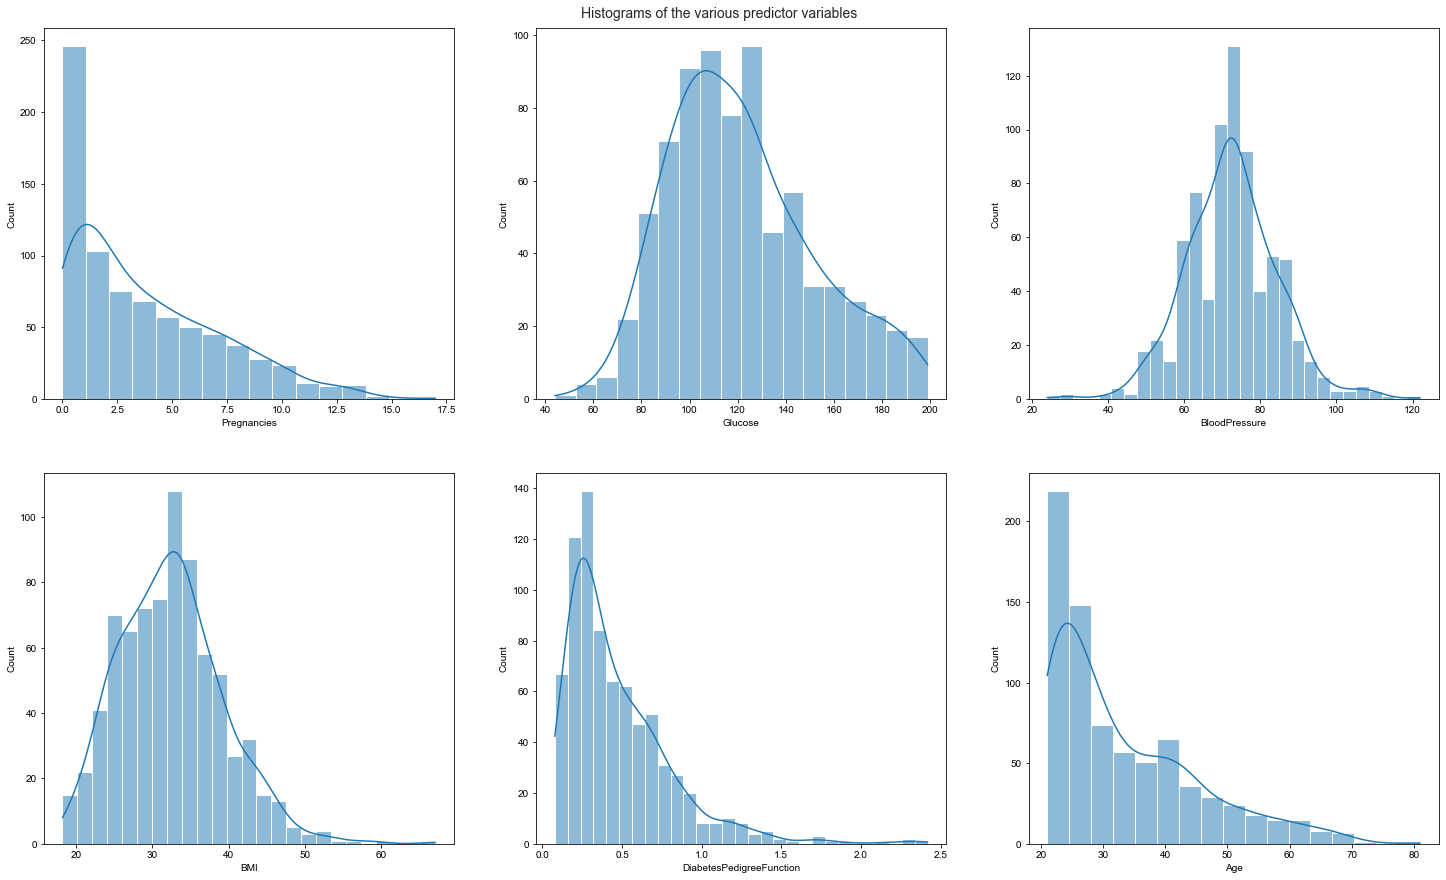

In [11]:
# Histogram plots
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
sns.set_style('whitegrid')

fig.suptitle('Histograms of the various predictor variables', \
             x=0.5, y=0.9, size='14') 

axes = [axs[0, 0], axs[0, 1], axs[0, 2], \
        axs[1, 0], axs[1, 1], axs[1, 2]]

for i,col in enumerate(data.columns[:-1]):
    # Kernel density estimation (KDE) overlays a probablisistic curve on the histogram
    sns.histplot(data[col], kde=True, ax=axes[i]) 